In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.8.0'

In [3]:
tf.config.list_physical_devices("GPU")

[]

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os

In [6]:
mnist =  tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 3s 0us/step


In [7]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [8]:
y_train_full.shape, y_train_full.dtype

((60000,), dtype('uint8'))

In [9]:
X_test.shape, X_test.dtype

((10000, 28, 28), dtype('uint8'))

In [10]:
y_test.shape, y_test.dtype

((10000,), dtype('uint8'))

In [11]:
X_valid, X_train = X_train_full[: 5000] / 255., X_train_full[5000 : ]/255.   # We divivde by 255, because to standardize the data, every value will between 0-255, standardize it to 0-1 

In [12]:
y_valid, y_train = y_train_full[: 5000], y_train_full[5000 : ]

In [13]:
X_test = X_test/255.

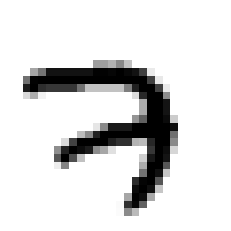

7

In [14]:
plt.imshow(X_train[0], cmap = "binary")
plt.axis("off")
plt.show()
y_train[0]

<AxesSubplot:>

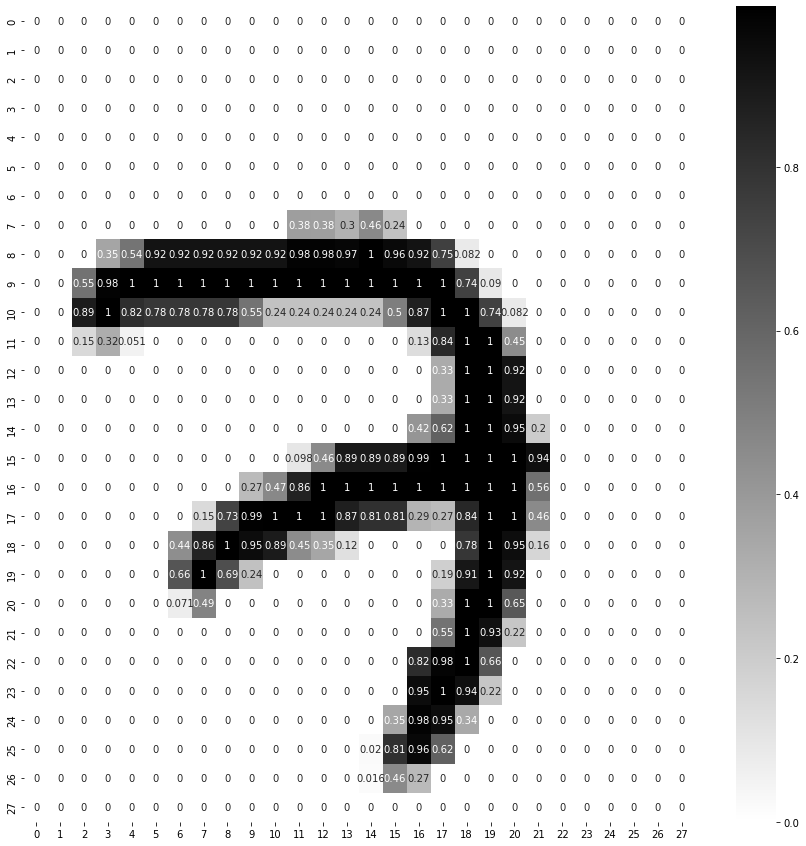

In [15]:
import seaborn as sns
plt.figure(figsize = (15, 15))
sns.heatmap(X_train[0], annot=True, cmap = "binary")

In [17]:
LAYERS =[
            tf.keras.layers.Flatten(input_shape =  [28, 28], name = "inputLayer"),
            tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
            tf.keras.layers.Dense(100, activation="relu", name = "hiddenLayer2"),
            tf.keras.layers.Dense(10, activation="softmax", name = "outputLayer"),
]

In [18]:
model = tf.keras.models.Sequential(LAYERS)

In [19]:
model.layers

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
784 * 300 + 300, 300 * 100 + 100, 100 * 10 + 10

235500

In [23]:
sum([784 * 300 + 300, 300 * 100 + 100, 100 * 10 + 10])

266610

In [24]:
hidden1 = model.layers[1]

model.get_layer(hidden1.name)

In [25]:
hidden1.get_weights()

[array([[ 0.07309242,  0.01601991,  0.03911535, ...,  0.02829133,
         -0.02553107, -0.04860283],
        [ 0.04798882,  0.03473689,  0.02067001, ..., -0.0210419 ,
         -0.04239026, -0.05878695],
        [ 0.00053368,  0.07247707, -0.0293236 , ..., -0.00432531,
         -0.06886851, -0.00399533],
        ...,
        [-0.01864585,  0.02141237, -0.04296257, ...,  0.04811232,
         -0.03362728,  0.07390606],
        [ 0.05045214,  0.05532025,  0.01302499, ..., -0.01567686,
         -0.02165783, -0.0610312 ],
        [ 0.02685284, -0.01486313, -0.04506568, ..., -0.0471978 ,
         -0.05507191,  0.03023545]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [26]:
weights, biases = hidden1.get_weights()

In [27]:
weights.shape

(784, 300)

In [28]:
biases.shape

(300,)

##### loss_function(actual, pred) =  error

In [30]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION, optimizer = OPTIMIZER, metrics = METRICS)

### Important -

* **Epochs**: Integer. 
    
    Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided. 

* **batch_size**: Integer or None. 
    
    Number of samples per gradient update. If unspecified, batch_size will default to 32. 
    
    *NOTE:* Do not specify the batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

* **validation_batch_size**: Integer or None. 

    Number of samples per validation batch. 
    
    If unspecified, will default to batch_size. 
    
    *NOTE:* Do not specify the validation_batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

[Reference](https://www.tensorflow.org/api_docs/python/tf/keras/Model?hl=zh-tw#fit)

In [32]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)


history =  model.fit(X_train, y_train, epochs=EPOCHS, validation_data = VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 22s 10ms/step - loss: 0.6108 - accuracy: 0.8406 - val_loss: 0.3117 - val_accuracy: 0.9130
Epoch 2/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2911 - accuracy: 0.9169 - val_loss: 0.2417 - val_accuracy: 0.9340
Epoch 3/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2367 - accuracy: 0.9321 - val_loss: 0.2021 - val_accuracy: 0.9448
Epoch 4/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2015 - accuracy: 0.9419 - val_loss: 0.1799 - val_accuracy: 0.9508
Epoch 5/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.1757 - accuracy: 0.9491 - val_loss: 0.1592 - val_accuracy: 0.9562
Epoch 6/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.1561 - accuracy: 0.9555 - val_loss: 0.1454 - val_accuracy: 0.9578
Epoch 7/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.1402 - accuracy: 0.9602 - val_loss: 0.1354 - val_a

In [33]:
55000./32.

1718.75

In [34]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0696 - accuracy: 0.9783


[0.0695752203464508, 0.9782999753952026]

In [35]:
model.save("model.h5")  # h5 is the extension for saving the keras model

In [36]:
loaded_model = tf.keras.models.load_model("model.h5")

In [37]:
loaded_model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.0696 - accuracy: 0.9783


[0.0695752203464508, 0.9782999753952026]

In [41]:
history.history

{'loss': [0.610776424407959,
  0.29108119010925293,
  0.23665055632591248,
  0.20150288939476013,
  0.1756848692893982,
  0.15612143278121948,
  0.14016284048557281,
  0.1264188140630722,
  0.11507996916770935,
  0.10573779046535492,
  0.0969209223985672,
  0.08952212333679199,
  0.08300256729125977,
  0.07691086828708649,
  0.07152281701564789,
  0.06666430085897446,
  0.06234069913625717,
  0.05818907171487808,
  0.054842524230480194,
  0.05114926025271416,
  0.048190172761678696,
  0.04509182646870613,
  0.042588844895362854,
  0.040258556604385376,
  0.037719544023275375,
  0.035746194422245026,
  0.03373930603265762,
  0.03172408416867256,
  0.029879551380872726,
  0.028202539309859276],
 'accuracy': [0.8405818343162537,
  0.9168909192085266,
  0.9320545196533203,
  0.9419272541999817,
  0.9490908980369568,
  0.9554545283317566,
  0.9601818323135376,
  0.9638909101486206,
  0.9671454429626465,
  0.9702181816101074,
  0.9732000231742859,
  0.9747818112373352,
  0.9766181707382202,


In [42]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.610776,0.840582,0.311684,0.9130
1,0.291081,0.916891,0.241717,0.9340
2,0.236651,0.932055,0.202068,0.9448
3,0.201503,0.941927,0.179922,0.9508
4,0.175685,0.949091,0.159236,0.9562
5,0.156121,0.955455,0.145395,0.9578
6,0.140163,0.960182,0.135419,0.9630
7,0.126419,0.963891,0.128393,0.9642
8,0.115080,0.967145,0.119061,0.9660
9,0.105738,0.970218,0.109950,0.9698


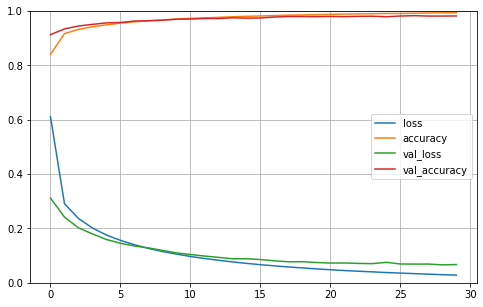

In [49]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [50]:
X_new = X_test[:3]
X_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [64]:
y_proba =  model.predict(X_new)
y_proba.round(2)    # Last layer had 10 points, so this has 10 values in each data point or pic

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [73]:
y_pred = np.argmax(y_proba, axis=-1)
y_pred 

array([7, 2, 1], dtype=int64)

In [71]:
y_new = y_test[:3]
y_new

array([7, 2, 1], dtype=uint8)

In [74]:
y_pred, y_new

(array([7, 2, 1], dtype=int64), array([7, 2, 1], dtype=uint8))

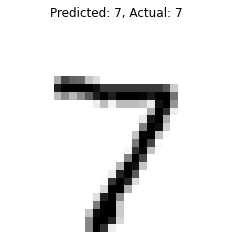

------------------------------------------------------------


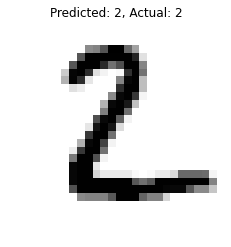

------------------------------------------------------------


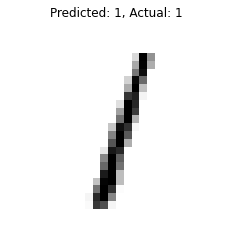

------------------------------------------------------------


In [75]:
for data, pred, actual in zip(X_new, y_pred, y_new):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("---"*20)

In [77]:
np.argmax([[1,2,3,4,5,6],[1,2,3,7,5,6]])

9